In [24]:
from pathlib import Path
from astropy.table import Table
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import astropy.units as u
import numpy as np
import yaml
from enum import StrEnum

In [25]:
datapath = Path.cwd().parent / "cloudy"

## Set up options for the different model sets

Options for the density law of the models set to plot: constant density or constant pressure.

In [26]:
class DensityLaw(StrEnum):
    CONSTANT_DENSITY = "n"
    CONSTANT_PRESSURE = "p"

Options for Ha luminosity normalization. The LOW option assumes covering fraction of unity and use (1 - sigma) times observed flux.

In [27]:
class LuminosityNorm(StrEnum):
    STANDARD = "lha"
    LOW = "llha"
    FIXED_PRESSURE = "nT62"

## Choose which options to make the figure for


In [28]:
dlaw = DensityLaw.CONSTANT_DENSITY
lnorm = LuminosityNorm.LOW

In [29]:
MODELSET = f"-{dlaw}-{lnorm}"

In [30]:
tab = Table.read(datapath / f"ou5a{MODELSET}-observables.csv")
df = tab.to_pandas()
df

,model,EOS,Z_amp,Z_lambda,HeII4686_Hb,HeI5016_Hb,OII4651_Hb,OIII5007_Hb,OIII4363_CO_Hb,OIII4363_RR_Hb,OIII4363_CX_Hb,OIII4363_Hb,OIII4363_over_OIII5007
0,ou5a-T115-L660-n-llha,const_n,0,homog,0.6301,0.02809,0.002563,16.8000,0.309400,0.000706,0.000361,0.31050,0.018490
1,ou5a-T115-L660-n-llha-Z06fluct-short,const_n,6,short,0.6906,0.02654,0.009514,11.9600,0.096850,0.002186,0.000891,0.09992,0.008353
2,ou5a-T115-L660-n-llha-Z06fluct-long,const_n,6,long,0.6874,0.02670,0.006510,14.2700,0.126600,0.002609,0.000938,0.13010,0.009118
3,ou5a-T115-L660-n-llha-Z15fluct-short,const_n,15,short,0.7349,0.02567,0.025050,2.9900,0.029500,0.004793,0.001106,0.03540,0.011840
4,ou5a-T115-L660-n-llha-Z15fluct-long,const_n,15,long,0.7702,0.02443,0.017450,5.6870,0.045110,0.005950,0.001093,0.05215,0.009170
5,ou5a-T115-L660-n-llha-Z30fluct-short,const_n,30,short,0.6884,0.02759,0.053400,1.0010,0.012020,0.007552,0.000955,0.02053,0.020510
6,ou5a-T115-L660-n-llha-Z30fluct-long,const_n,30,long,0.7380,0.02471,0.040590,2.3830,0.020590,0.009452,0.000972,0.03101,0.013010
7,ou5a-T115-L660-n-llha-Z60fluct-short,const_n,60,short,0.6053,0.03004,0.107400,0.4440,0.006846,0.011140,0.000845,0.01883,0.042410
8,ou5a-T115-L660-n-llha-Z60fluct-long,const_n,60,long,0.6361,0.02695,0.085020,1.0760,0.010770,0.013920,0.000869,0.02556,0.023750
9,ou5a-T115-L660-n-llha-Z120fluct-short,const_n,120,short,0.5741,0.03031,0.210900,0.2505,0.006008,0.018720,0.000865,0.02560,0.102200


<Axes: >

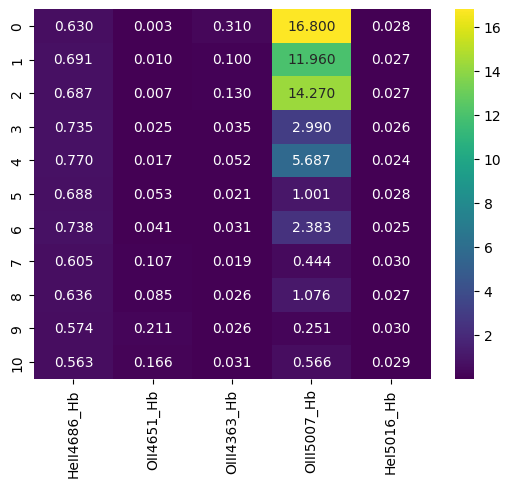

In [31]:
ratios = ["HeII4686_Hb", "OII4651_Hb", "OIII4363_Hb", "OIII5007_Hb", "HeI5016_Hb"]
sns.heatmap(df[ratios], cmap="viridis", annot=True, fmt=".3f")

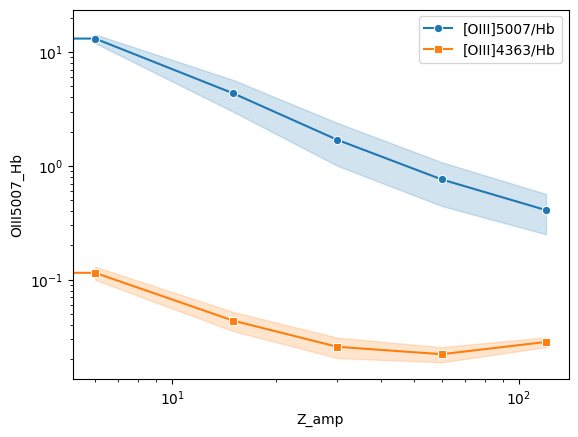

In [32]:
fig, ax = plt.subplots()
sns.lineplot(data=df, x="Z_amp", y="OIII5007_Hb", marker="o", label="[OIII]5007/Hb")
sns.lineplot(data=df, x="Z_amp", y="OIII4363_Hb", marker="s", label="[OIII]4363/Hb")
ax.set_xscale("log")
ax.set_yscale("log")

plt.legend()

In [33]:
df = df.assign(OIII4363_CO_over_OIII5007=df.OIII4363_CO_Hb / df.OIII5007_Hb)
df[["OIII4363_over_OIII5007", "OIII4363_CO_over_OIII5007"]]

,OIII4363_over_OIII5007,OIII4363_CO_over_OIII5007
0,0.018490,0.018417
1,0.008353,0.008098
2,0.009118,0.008872
3,0.011840,0.009866
4,0.009170,0.007932
5,0.020510,0.012008
6,0.013010,0.008640
7,0.042410,0.015419
8,0.023750,0.010009
9,0.102200,0.023984


In [34]:
yaml.load?

Signature: yaml.load(stream, Loader)
Docstring:
Parse the first YAML document in a stream
and produce the corresponding Python object.
File:      ~/Dropbox/teresa-pn-ou5/.venv/lib/python3.11/site-packages/yaml/__init__.py
Type:      function

In [35]:
df = df.assign(
    T_Ha = [
        yaml.safe_load((datapath / (stem + "-global.yaml")).read_text())["H  1 6562.80A"]["Mean Te"]
        for stem in df.model
    ]
)

In [36]:
yaml.safe_load?

Signature: yaml.safe_load(stream)
Docstring:
Parse the first YAML document in a stream
and produce the corresponding Python object.

Resolve only basic YAML tags. This is known
to be safe for untrusted input.
File:      ~/Dropbox/teresa-pn-ou5/.venv/lib/python3.11/site-packages/yaml/__init__.py
Type:      function

## Make the summary plot

In [37]:
tdict = {
    DensityLaw.CONSTANT_PRESSURE: "pressure",
    DensityLaw.CONSTANT_DENSITY: "density",
}

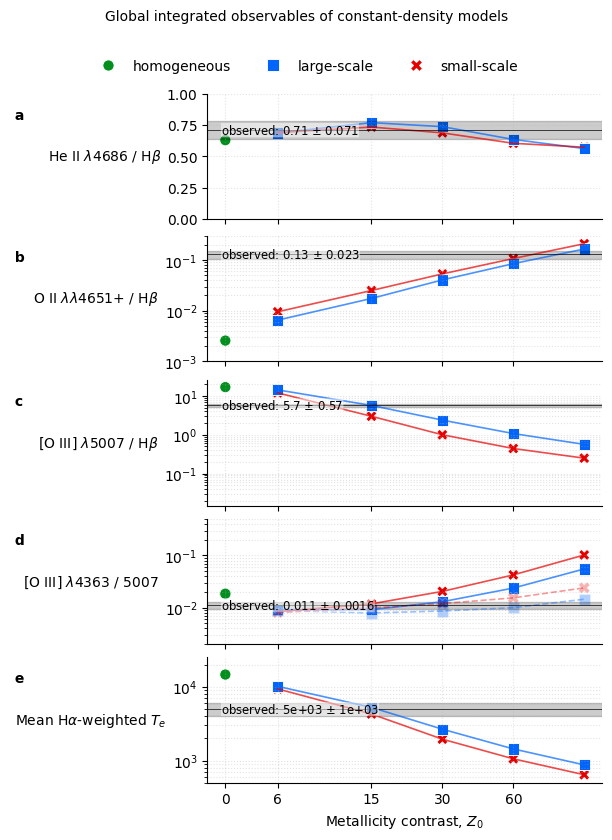

In [38]:

ratios = [
    "HeII4686_Hb",
    # "HeI5016_Hb",
    "OII4651_Hb",
    "OIII5007_Hb",
    #"OIII4363_Hb",
    "OIII4363_over_OIII5007",
    "T_Ha",
]

ylimits = {
    "HeII4686_Hb": (0.0, 1.0),
    "OII4651_Hb": (0.001, 0.3),
    "OIII5007_Hb": (0.015, 25),
    "OIII4363_Hb": (0.001, 0.5),
    "OIII4363_over_OIII5007": (0.002, 0.5),
    "T_Ha": (500, 25_000),
}    

# Estimate of spatial variation in line ratios (%). Added as source of error
e_spatial = 10
# From Corradi+(2015). Tuples of (Value, % error)
observed_ratios = {
    "HeII4686_Hb": (71/100, np.hypot(1, e_spatial)),
    "OII4651_Hb": (13.0/100, np.hypot(15, e_spatial)), # Summed components of V1 multiplet
    "OIII5007_Hb": (567/100, np.hypot(1, e_spatial)),
    "OIII4363_Hb": (6.33/100, np.hypot(10, e_spatial)),
    "OIII4363_over_OIII5007": (6.33/567, np.hypot(10, e_spatial)),
    "T_Ha": (5000, 20),
}

ratio_labels = {
    "HeII4686_Hb": r"He II $\lambda$4686 / H$\beta$",
    "OII4651_Hb": r"O II $\lambda\lambda$4651+ / H$\beta$", 
    "OIII5007_Hb": r"[O III] $\lambda$5007 / H$\beta$",
    "OIII4363_Hb": r"[O III] $\lambda$4363 / H$\beta$",
    "OIII4363_over_OIII5007": r"[O III] $\lambda$4363 / 5007",
    "T_Ha": r"Mean H$\alpha$-weighted $T_e$",
}

# consistent palette/markers for Z_lambda
# hue_order = ["homog", "short", "long"]
# palette   = dict(zip(hue_order, sns.color_palette(n_colors=len(hue_order))))

palette = {
    "homog": "xkcd:emerald green",
    "long": "xkcd:bright blue",
    "short": "xkcd:red",
}
hue_order = list(palette)
style_kws = dict(
    markers={"homog": "o", "short": "X", "long": "s"}, 
)

# make compact vertical stack
height_per = 1.5  # inches per panel (shrink here to compress further)
fig, axes = plt.subplots(len(ratios), 1, figsize=(6, height_per*len(ratios)),
                         sharex=True, constrained_layout=True)

# draw once to capture legend artists from the first axis
for i, (ax, col) in enumerate(zip(axes, ratios)):
    # points
    sns.scatterplot(
        data=df, x="Z_amp", y=col, hue="Z_lambda", style="Z_lambda",
        hue_order=hue_order, palette=palette, s=65, ax=ax, **style_kws
    )
    # lines per Z_lambda
    for zlam, g in df.sort_values("Z_amp").groupby("Z_lambda"):
        ax.plot(g["Z_amp"], g[col], alpha=0.7, color=palette.get(zlam), lw=1.2)

    # Add in collisional-only ratio for 4363/5007
    if col.startswith("OIII4363"):
        colc = col.replace("4363", "4363_CO")
        sns.scatterplot(
            data=df, x="Z_amp", y=colc, hue="Z_lambda", style="Z_lambda",
            hue_order=hue_order, palette=palette, s=65, ax=ax, alpha=0.3, **style_kws
        )
        for zlam, g in df.sort_values("Z_amp").groupby("Z_lambda"):
            ax.plot(g["Z_amp"], g[colc], alpha=0.4, ls="dashed", color=palette.get(zlam), lw=1.2)
      
    # Add horizonal bands for observed values
    observed, e_observed = observed_ratios[col]
    eps = observed * e_observed / 100
    olabel = fr"observed: {observed:.2g} $\pm$ {eps:.2g}"
    ax.axhspan(
        observed - eps, observed + eps,
        alpha=0.2, color="k",
    )
    ax.axhline(observed, color="k", linestyle="solid", lw=0.5)
    ax.text(-0.5, observed, olabel, va="center", fontsize="small", bbox=dict(fc="w", lw=0, alpha=0.5, boxstyle="Round, pad=0.01"))
    
    ax.set_yscale("linear" if col.startswith("HeII") else "log")
    # symlog x: compress the linear segment around 0 to avoid the big gap
    ax.set_xscale("symlog", linthresh=6, linscale=0.2, subs=[1,2,3,4,5,6,7,8,9])

    ax.set_ylim(*ylimits[col])
    ax.set_ylabel(ratio_labels[col], y=0.5, rotation=0, ha="right", va="center")
    ax.grid(True, which="both", ls=":", alpha=0.35)

    # remove per-panel legends; we’ll add a single figure legend below
    ax.legend_.remove()

# Add subfig labels
for ax, label in zip(axes, "abcde"):
    ax.text(-0.5, 0.8, " " + label, fontweight="heavy", transform=ax.transAxes)
   
# tidy x axis: show the discrete amplitudes you have
axes[-1].set_xlabel("Z_amp")
axes[-1].set_xticks([0, 6, 15, 30, 60])
axes[-1].set_xticklabels([str(s) for s in axes[-1].get_xticks()])

axes[-1].get_xaxis().set_minor_locator(plt.NullLocator())

axes[-1].set_xlabel(r"Metallicity contrast, $Z_0$")

# single legend (from the first axes)
handles, labels = axes[0].get_legend_handles_labels()
labelsubs = {
    "homog": "homogeneous",
    "long": "large-scale",
    "short": "small-scale",
}
fig.legend(
    handles, labelsubs.values(), ncol=3, frameon=False, 
    loc="upper center", bbox_to_anchor=(0.5, 1.05)
)
title = ( 
    fr"Global integrated observables of constant-{tdict[dlaw]} models"
)
fig.suptitle(title, x=0.5, y=1.1, ha="center", fontsize="medium")
sns.despine()
fig.savefig(f"ou5-cloudy-line-ratios-vs-observed{MODELSET}.pdf", bbox_inches="tight")

# Admixture of different models

The idea is to take seriously Fig 17 of the paper to fix the cool phase fraction $\omega$ based on the mean hydrogen $T$. For fluctuating models where *all* the recombination line emission comes from the cool phase, then $\omega$ would become the shell covering fraction with fluctuations, and $(1 - \omega)$ would be the covering fraction of homogeneous shell. 

In the limit of $T_\mathrm{cool} \ll T_\mathrm{warm}$ we have that $T = (1 - \omega) T_\mathrm{warm}$, where $\omega$ is the fraction of H recombination line emission that comes from the cool phase.  

The models suggest that $T_\mathrm{warm} \approx 20\,000$ K (or $30\,0000$ at lower densities), and the measured $T(\mathrm{H})$ is about 5000 K for the whole nebula (or 3000 K for the inner ring). 

So this suggests $ 1 - \omega \approx 0.25$ or $\omega \approx 0.75$. So, we can try a combination of $(1 - \omega)$ times the homogeneous model + $\omega$ times the fluctuating model

If all the models are normalized to the same Ha flux, then we can just take the $\omega$-weighted average of the ratios over H beta. And the same for the Ha temperature. But 4363/5007 needs special treatment: we need to average 4363/Hb and 5007/Hb before recalculating the ratio.

In [39]:
#omega = 0.7
omega = 0.6

These are the columns that will transform linearly

In [40]:
acols = [
    "HeII4686_Hb",
    "OII4651_Hb",
    "OIII5007_Hb",
    "OIII4363_Hb",
    "T_Ha",
]

Build a new data frame for the ratios of the admixture models. We use the Z06-long model mixed with 

In [41]:
dfa = df[["Z_amp", "Z_lambda"]].assign(
    **{
        # Weighted average of fluctuating and homogeneous models
        acol: omega * df[acol] + (1.0 - omega) * df[acol][2]
        for acol in acols
    }
)

Add back in the 4363/5007 ratio

In [42]:
dfa = dfa.assign(OIII4363_over_OIII5007 = dfa.OIII4363_Hb / dfa.OIII5007_Hb)

And put the pure homogeneous model back in as the first row.

In [43]:
dfa.loc[0] = df[dfa.columns].loc[0]

In [44]:
dfa

,Z_amp,Z_lambda,HeII4686_Hb,OII4651_Hb,OIII5007_Hb,OIII4363_Hb,T_Ha,OIII4363_over_OIII5007
0,0,homog,0.63010,0.002563,16.80000,0.310500,14638.427615,0.018490
1,6,short,0.68932,0.008312,12.88400,0.111992,9665.761234,0.008692
2,6,long,0.68740,0.006510,14.27000,0.130100,10133.102498,0.009117
3,15,short,0.71590,0.017634,7.50200,0.073280,6615.316693,0.009768
4,15,long,0.73708,0.013074,9.12020,0.083330,7203.992262,0.009137
5,30,short,0.68800,0.034644,6.30860,0.064358,5221.816792,0.010202
6,30,long,0.71776,0.026958,7.13780,0.070646,5648.674616,0.009897
7,60,short,0.63814,0.067044,5.97440,0.063338,4686.114577,0.010602
8,60,long,0.65662,0.053616,6.35360,0.067376,4915.504762,0.010604
9,120,short,0.61942,0.129144,5.85830,0.067400,4437.999647,0.011505


That looks good for everything

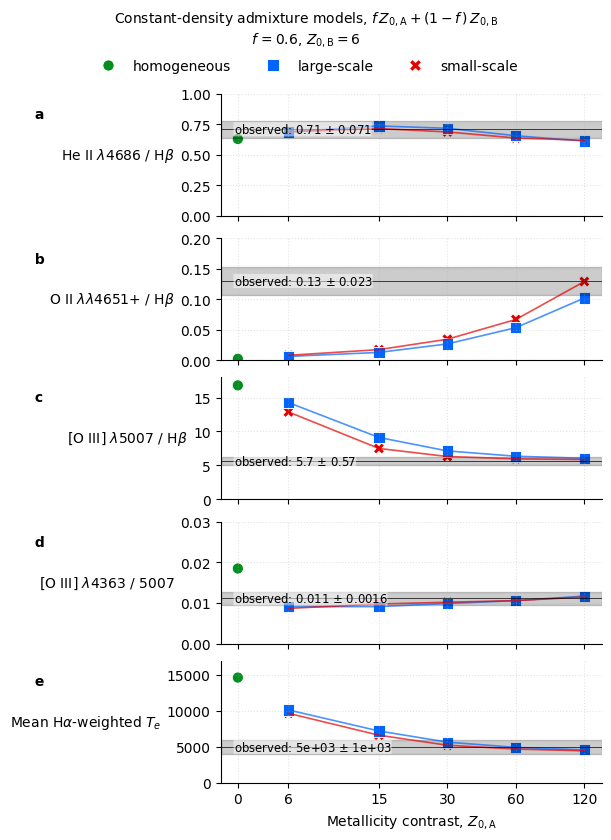

In [45]:
# make compact vertical stack
height_per = 1.5  # inches per panel (shrink here to compress further)
fig, axes = plt.subplots(len(ratios), 1, figsize=(6, height_per*len(ratios)),
                         sharex=True, constrained_layout=True)
ylimitsa = {
    "HeII4686_Hb": (0.0, 1.0),
    "OII4651_Hb": (0.0, 0.2),
    "OIII5007_Hb": (0.0, 18),
    "OIII4363_Hb": (0.0, 0.025),
    "OIII4363_over_OIII5007": (0.0, 0.03),
    "T_Ha": (0, 17_000),
}    

for i, (ax, col) in enumerate(zip(axes, ratios)):
    # points
    sns.scatterplot(
        data=dfa, x="Z_amp", y=col, hue="Z_lambda", style="Z_lambda",
        hue_order=hue_order, palette=palette, s=65, ax=ax, **style_kws
    )
    # lines per Z_lambda
    for zlam, g in dfa.sort_values("Z_amp").groupby("Z_lambda"):
        ax.plot(g["Z_amp"], g[col], alpha=0.7, color=palette.get(zlam), lw=1.2)

   # Add horizonal bands for observed values
    observed, e_observed = observed_ratios[col]
    eps = observed * e_observed / 100
    olabel = fr"observed: {observed:.2g} $\pm$ {eps:.2g}"
    ax.axhspan(
        observed - eps, observed + eps,
        alpha=0.2, color="k",
    )
    ax.axhline(observed, color="k", linestyle="solid", lw=0.5)
    ax.text(-0.5, observed, olabel, va="center", fontsize="small", bbox=dict(fc="w", lw=0, alpha=0.5, boxstyle="Round, pad=0.01"))
    
    ax.set_yscale("linear")
    # # symlog x: compress the linear segment around 0 to avoid the big gap
    ax.set_xscale("symlog", linthresh=6, linscale=0.2, subs=[1,2,3,4,5,6,7,8,9])
   
    ax.set_ylim(*ylimitsa[col])
    ax.set_ylabel(ratio_labels[col], y=0.5, rotation=0, ha="right", va="center")
    ax.grid(True, which="both", ls=":", alpha=0.35)

    # remove per-panel legends; we’ll add a single figure legend below
    ax.legend_.remove()

# Add subfig labels
for ax, label in zip(axes, "abcde"):
    ax.text(-0.5, 0.8, " " + label, fontweight="heavy", transform=ax.transAxes)
   
# tidy x axis: show the discrete amplitudes you have
axes[-1].set_xticks([0, 6, 15, 30, 60, 120])
axes[-1].set_xticklabels([str(s) for s in axes[-1].get_xticks()])

axes[-1].get_xaxis().set_minor_locator(plt.NullLocator())

axes[-1].set_xlabel(r"Metallicity contrast, $Z_{0,\mathrm{A}}$")

# single legend (from the first axes)
handles, labels = axes[0].get_legend_handles_labels()
labelsubs = {
    "homog": "homogeneous",
    "long": "large-scale",
    "short": "small-scale",
}
fig.legend(
    handles, labelsubs.values(), ncol=3, frameon=False, 
    loc="upper center", bbox_to_anchor=(0.5, 1.05)
)
title = ( 
    fr"Constant-{tdict[dlaw]} admixture models, "
    r"$f\,Z_{0,\mathrm{A}} + (1 - f\,)\, Z_{0,\mathrm{B}}$"
    "\n"
    fr"$f\, = {omega}$, $Z_{{0,\mathrm{{B}}}} = 6$"
)
fig.suptitle(title, x=0.5, y=1.1, ha="center", fontsize="medium")
sns.despine()
fig.savefig(f"ou5-cloudy-admixture-line-ratios-vs-observed{MODELSET}.pdf", bbox_inches="tight")